In [1]:
import streamlit as st
import os
import matplotlib.pyplot as plt
from eval import predict,PerfectMatch,AGE_TO_INDEX,GENDER_TO_INDEX,load_checkpoint
from transformers import BertTokenizer, BertModel
import torch 
import torch.optim as optim
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

ModuleNotFoundError: No module named 'wordcloud'

In [3]:
!pip install transformers
!pip install seaborn
#!pip install  torchtext==0.10.0
!pip install  bs4
!pip install  streamlit
!pip install  lxml
!pip install  openpyxl
!pip install  nltk

You should consider upgrading via the 'c:\users\dasan\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\dasan\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


  Using cached bs4-0.0.1.tar.gz (1.1 kB)
Using legacy 'setup.py install' for bs4, since package 'wheel' is not installed.
    Running setup.py install for bs4: started
    Running setup.py install for bs4: finished with status 'done'


You should consider upgrading via the 'c:\users\dasan\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\dasan\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\dasan\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\dasan\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\dasan\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip install  torchtext==0.10.0


You should consider upgrading via the 'c:\users\dasan\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [1]:
!pip install streamlit==1.10.0

You should consider upgrading via the 'c:\users\dasan\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [8]:
import re 

string = ' This is  ä ?_)(*?:%;№ 23712943289 р аотыизуаотвпbnjbkd[ \n öerlergr'

re.sub(r'\W', ' ', string, flags= re.UNICODE)

' This is  ä  _         23712943289 р аотыизуаотвпbnjbkd    öerlergr'

In [6]:
import re 

string = ' This is  ä ?_)(*?:%;№ 23712943289 р аотыизуаотвпbnjbkd['

re.sub(r'\W', ' ' , string, flags= re.UNICODE)

' This is  ä  _         23712943289 р аотыизуаотвпbnjbkd '

In [22]:
import os 
DATA_INPUT = r'C:\Users\vi04wecu\Desktop\Hackbay\data'

os.path.join(DATA_INPUT, 'hackbay_features.csv')

'C:\\Users\\vi04wecu\\Desktop\\Hackbay\\data\\hackbay_features.csv'

In [4]:


with open('C:\\Users\\vi04wecu\\Desktop\\Hackbay\\data\\1000745902_\\1000745902_.html','r', encoding="ISO-8859-1") as f: 
    a = f.read()


In [13]:
HACKBAY_FILE = r'C:\Users\vi04wecu\Desktop\Hackbay'
DATA_INPUT = r'C:\Users\vi04wecu\Desktop\Hackbay\data'
DATA_OUTPUT = r'C:\Users\vi04wecu\Desktop\Hackbay\processed_data'


#directory_lists = os.path.normpath("/content/drive/MyDrive/unzipped_hackbay")       # change / to \ in datapath

directory_lists = DATA_INPUT 
for directory in os.listdir(directory_lists):
    directory = os.path.join(directory_lists,directory)      
    #print(directory)    
    for fi in os.listdir(directory):
        #print(fi)
        #for par in os.listdir(os.path.join(directory, fi)):
            file = os.path.join(directory, fi)
            if file.endswith('.html'):
                print(fi)
            


1000745902_.html
1002245918_.html
1004408714_.html
1005653871_.html
1005850517_.html
1008870613_.html
1009397088_.html
1012542963_.html
101453283_.html
1015809620_.html
1016338668_.html
1018571583_.html
1024462720_.html
1024919095_.html
1025709315_.html
1026231883_.html
1027081724_.html
1029903534_.html
1032130430_.html
1033840451_.html
1034099097_.html
1036060199_.html
1036060258_.html
1037829743_.html
1038878320_.html
1039795831_.html
1040065781_.html
1040189054_.html
1040516727_.html
1041503346_.html
1044390866_.html
1046677099_.html
1047273118_.html
1047599185_.html
1047660168_.html
1047922315_.html
1048458355_.html
1049757310_.html
1052313207_.html
1054410389_.html
1054541427_.html
1054871478_.html
1055000191_.html
105519051_.html
1056114289_.html
1056378711_.html
1056704123_.html
1057228409_.html
1057228414_.html
1058145920_.html
1059312096_.html
1059522170_.html
1060964004_.html
1061558926_.html
1061688602_.html
10624098_.html
1062733456_.html
1063243518_.html
1063323227_.html
1

In [ ]:
for directory in os.listdir(directory_lists):
  directory = os.path.join(directory_lists,directory)
  with tqdm(total = len(os.listdir(directory))) as pbar:             
      for fi in os.listdir(directory):
          for par in os.listdir(os.path.join(directory, fi)):
              file = os.path.join(directory, fi, par)

In [24]:
HACKBAY_FILE = r'C:\Users\vi04wecu\Desktop\Hackbay'
DATA_INPUT = r'C:\Users\vi04wecu\Desktop\Hackbay\data'
DATA_OUTPUT = r'C:\Users\vi04wecu\Desktop\Hackbay\processed_data'
import pandas as pd

train_df = pd.read_excel(os.path.join(DATA_OUTPUT, 'hackbay_train_dataset.xlsx')).fillna('')

GENDER_TO_INDEX = {
    'maennlich':0,
    'weiblich':1
}

AGE_TO_INDEX = {
'16 bis 17 Jahre':0,
 '50 bis 54 Jahre':1,
 '65 bis 69 Jahre':2,
 '25 bis 29 Jahre':3,
 '14 bis 15 Jahre':4,
 '55 bis 59 Jahre':5,
 '10 bis 13 Jahre':6,
 '75 und mehr Jahre':7,
 '60 bis 64 Jahre':8,
 '35 bis 39 Jahre':9,
 '40 bis 44 Jahre':10,
 '70 bis 74 Jahre':11,
 '30 bis 34 Jahre':12,
 '45 bis 49 Jahre':13,
 '18 bis 19 Jahre':14,
 '20 bis 24 Jahre':15
 }

GENDER_CLASSES = len(GENDER_TO_INDEX)
AGE_CLASSES = len(AGE_TO_INDEX)
BATCH_SIZE=1024

TEXT_COL_NAME='text'
GENDER_COL_NAME='gender'
AGE_COL_NAME='age'
MAX_SEQ_LEN=512


In [ ]:
MAX_SEQ_LEN = 512
def preprocess_text(text):
  # preprocess text.
  # remove non-alphanumeric characters
  # keep numbers
  text = re.sub(r'\W+',' ',text,flags=re.UNICODE)
  text = re.sub(r'[\n\t\r]',' ',text)       # delete linebreakers on windows, linux, mac?
  
  # trim to required length
  text = text[:MAX_SEQ_LEN]
  return text

In [25]:
import re
train_df['text'] =  train_df['title']+ ' '+ train_df['text']
train_df['text'] = train_df['text'].apply(lambda x: preprocess_text(' '.join(x.split('|'))))

In [28]:
train_df['text']

0          Aktuelle Prospekte jede Woche neue Angebote K...
1          Aktuelle Prospekte jede Woche neue Angebote K...
2          Aktuelle Prospekte jede Woche neue Angebote K...
3          Aktuelle Prospekte jede Woche neue Angebote K...
4          Aktuelle Prospekte jede Woche neue Angebote K...
                                ...                        
237468                                             Loading 
237469                                             Loading 
237470                                             Loading 
237471                                             Loading 
237472                                             Loading 
Name: text, Length: 237473, dtype: object

In [ ]:

train_df['age'] = train_df['age'].apply(lambda x:AGE_TO_INDEX[x])
train_df['gender'] = train_df['gender'].apply(lambda x:GENDER_TO_INDEX[x])
train_df['text'] =  train_df['title']+ ' '+ train_df['text']
train_df['text'] = train_df['text'].apply(lambda x: preprocess_text(' '.join(x.split('|'))))

tr_df = train_df.drop(['url_id', 'title','keywords','colors','number_of_images','hashed_id'], axis = 1)


valid_size = 0.2
valid_len = int(valid_size*tr_df.shape[0])
valid_indices = [i for i in range(valid_len)]
train_indices = [i for i in range(len(tr_df)) if i not in valid_indices]

train = tr_df.iloc[train_indices]
train.to_csv('train.csv',index=False)

valid = tr_df.iloc[valid_indices]
valid.to_csv('valid.csv',index=False)

In [21]:
len(train_df.text[1])

1273

In [ ]:
import pandas as pd
recommendation_df = pd.read_excel(r'C:\Users\vi04wecu\Desktop\Hackbay\processed_data\hackbay_train_dataset.xlsx')

In [9]:

option_gender = 'weiblich'
option_age= '50 bis 54 Jahre'
our_recommendation = recommendation_df[(recommendation_df['gender']==option_gender) & (recommendation_df['age']==option_age)]
our_recommendation

['#ffffff,#e10915',
 '#ffffff,#e10915',
 '#ffffff,#e10915',
 '#ffffff,#e10915',
 '#ffffff,#e10915',
 '#ffffff,#e10915',
 '#ffffff,#e10915',
 '#ffffff,#e10915',
 '#ffffff,#e10915',
 '#ffffff,#424242,#737373,#2d9b55,#404040,#003a70,#70d159,#f2f2f2,#e10915',
 '#ffffff,#424242,#737373,#2d9b55,#404040,#003a70,#70d159,#f2f2f2,#e10915',
 '#ffffff,#424242,#737373,#2d9b55,#404040,#003a70,#70d159,#f2f2f2,#e10915',
 '#ffffff,#424242,#737373,#2d9b55,#404040,#003a70,#70d159,#f2f2f2,#e10915',
 '#ffffff,#424242,#737373,#2d9b55,#404040,#003a70,#70d159,#f2f2f2,#e10915',
 '#ffffff,#424242,#737373,#2d9b55,#404040,#003a70,#70d159,#f2f2f2,#e10915',
 '#ffffff,#424242,#737373,#2d9b55,#404040,#003a70,#70d159,#f2f2f2,#e10915',
 '#ffffff,#424242,#737373,#2d9b55,#404040,#003a70,#70d159,#f2f2f2,#e10915',
 '#ffffff,#424242,#737373,#2d9b55,#404040,#003a70,#70d159,#f2f2f2,#e10915',
 '#ffffff,#e10915',
 '#ffffff,#e10915',
 '#ffffff,#e10915',
 '#ffffff,#e10915',
 '#ffffff,#e10915',
 '#ffffff,#e10915',
 nan,
 nan,
 nan

In [32]:
pd.Series(colors_recommend).value_counts()[3:8].index.tolist()

['#696969', '#d8d8d8', '#f8f8f8', '#e4e4e4', '#f0f0f0']

In [ ]:

option_gender = 'weiblich'
option_age= '50 bis 54 Jahre'
our_recommendation = recommendation_df[(recommendation_df['gender']==option_gender) & (recommendation_df['age']==option_age)]
colors_recommend = [c.split(',') for c in colors_recommend if c ]
colors_recommend = [c_ for c_ in our_recommendation['colors'].values.tolist()]
color_pal = pd.Series(colors_recommend).value_counts()[3:8].index.tolist()

In [ ]:
our_recommendation = recommendation_df[(recommendation_df['gender']==option_gender) & (recommendation_df['age']==option_age)]
colors_recommend = [c_ for c_ in our_recommendation['colors'].values.tolist()]
colors_recommend_ = [c.split(',') for c in colors_recommend if c is not np.nan]
colors_recommend = [l for m in colors_recommend_ for l in m]
color_pal = pd.Series(colors_recommend).value_counts()[3:8].index.tolist()

<AxesSubplot:>

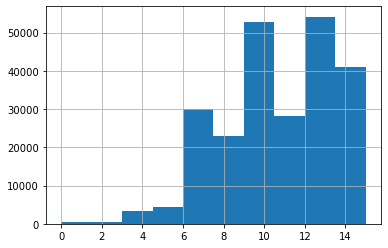

In [42]:
data = pd.read_csv('../train.csv')

from sklearn.preprocessing import OrdinalEncoder
age_groups = ['10 bis 13 Jahre' , '14 bis 15 Jahre' , '16 bis 17 Jahre',  \
    '18 bis 19 Jahre' , '20 bis 24 Jahre', \
    '25 bis 29 Jahre', '30 bis 34 Jahre', '35 bis 39 Jahre', \
    '40 bis 44 Jahre','45 bis 49 Jahre' , '50 bis 54 Jahre', \
    '55 bis 59 Jahre', '60 bis 64 Jahre', '65 bis 69 Jahre', \
    '70 bis 74 Jahre',   '75 und mehr Jahre']
oe = OrdinalEncoder(categories = [age_groups])
data[['age_groups']] = oe.fit_transform(data[['age']])

data['age_groups'].hist()


In [2]:
#!pip install graphviz torchviz

In [1]:
import torch
from torchviz import make_dot
from torchvision.models import vgg16  #  With  vgg16  For example 

In [2]:
x = torch.randn(4, 3, 32, 32)  #  Randomly generate a tensor 
model = vgg16()  #  Instantiation  vgg16, The network can be changed into its own network 
out = model(x)   #  take  x  Input network 
g = make_dot(out)  #  Instantiation  make_dot
g.view()  #  Save directly in the current path  pdf  And open 

c:\Users\vi04wecu\Anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
There is no layout engine support for "dot"
Perhaps "dot -c" needs to be run (with installer's privileges) to register the plugins?


CalledProcessError: Command '[WindowsPath('dot'), '-Kdot', '-Tpdf', '-O', 'Digraph.gv']' returned non-zero exit status 1. [stderr: b'There is no layout engine support for "dot"\r\nPerhaps "dot -c" needs to be run (with installer\'s privileges) to register the plugins?\r\n']

In [6]:
import os
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertModel
import torch 
import torch.optim as optim
import pandas as pd
import seaborn as sns
import numpy as np

from eval import predict,PerfectMatch,AGE_TO_INDEX,GENDER_TO_INDEX,load_checkpoint

device = torch.device('cuda' if True and torch.cuda.is_available() else 'cpu')

def load_params():
    model = PerfectMatch().to(device)
    model_path = 'perfect_match_model.pt'
    if os.path.exists(model_path):
        optimizer = optim.Adam(model.parameters(), lr=0.0001)
        model,optimizer = load_checkpoint(model_path, model, optimizer)

    model = model.to(device)
    # Define tokenizer
    tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-uncased')
    
    # Load (and possibly transform) our dataset which will be used for making recommendations
    recommendation_df = pd.read_excel('hackbay_recommendations.xlsx')
    return model,tokenizer,recommendation_df



In [9]:
DATA_DIR =r'C:\Users\vi04wecu\Desktop\Hackbay\processed_data'
test_df = pd.read_excel(os.path.join(DATA_DIR, 'hackbay_test_dataset.xlsx'))
test_labels = pd.read_csv(os.path.join(r'C:\Users\vi04wecu\Desktop\Hackbay', 'test_with_labels.csv'))
model, tokenizer = load_params()    

Some weights of the model checkpoint at bert-base-multilingual-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Model loaded from <== perfect_match_model.pt


In [31]:
#data['prediction'] = test_df['text'].apply(predict, args=(model, tokenizer))


In [26]:
test_df['prediction'] = ''
test_df['text'].fillna("nan",inplace=True)

for i in range(test_df.shape[0]):
    if test_df['text'][i]!='nan':
        test_df['prediction'][i] = predict( test_df['text'][i], model, tokenizer)

<ipython-input-26-a98db1cf37e4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['prediction'][i] = predict( test_df['text'][i], model, tokenizer)


In [35]:
test_labels.join(test_df['prediction'], test_labels)

KeyError:                                                hashed_id              age  \
0      5cf924fe5256a7c5e8e8b7b4878eeaaafa3d9a65c693bb...  70 bis 74 Jahre   
1      21dbef596cf913685e8e5a849e30b2177d76ba636fa297...  30 bis 34 Jahre   
2      21dbef596cf913685e8e5a849e30b2177d76ba636fa297...  30 bis 34 Jahre   
3      e3cd5e12760163c0c7b7968c41d5add21415db2a2f754f...  30 bis 34 Jahre   
4      c447f90efc3edceb66e5d038a426f60fd92e84341e523e...  45 bis 49 Jahre   
...                                                  ...              ...   
48516  98adf10b5a9d50735c631122891dfdbcd5f539e36f52bd...  45 bis 49 Jahre   
48517  acfb224317220f93862b32e30614b1849fa4d3104b53a8...  55 bis 59 Jahre   
48518  a8543593eca8cca30b2a35e8e8e07256e2ce4eef26085f...  45 bis 49 Jahre   
48519  f1b7261b9a37543b289b901e9b427c0fc845f4d66dc301...  45 bis 49 Jahre   
48520  bda59c9eb2ec15072a552e875bf0135b1bfe28ad123fa5...  45 bis 49 Jahre   

          gender       url_id  
0      maennlich  1311770400_  
1       weiblich  2635343776_  
2       weiblich  1311770400_  
3      maennlich  1311770400_  
4       weiblich  1311770400_  
...          ...          ...  
48516  maennlich  2350647830_  
48517  maennlich  2350647830_  
48518  maennlich  2350647830_  
48519  maennlich  2350647830_  
48520  maennlich  2350647830_  

[48521 rows x 4 columns]

In [43]:
test_df.to_csv(os.path.join(DATA_DIR, 'prediction_test.csv'))

In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score
import torch.nn as nn
def compute_metrics(labels,probs):
  softmax = nn.Softmax(dim=1)
  preds =softmax(probs)
  acc_preds = torch.argmax(preds,dim=1).squeeze().cpu().tolist()
  labels = labels.squeeze().cpu().tolist()
  acc = accuracy_score(labels,acc_preds)
  f1 = f1_score(labels,acc_preds,average='weighted')
  return {'f1': f1, 'accuracy':acc}

In [49]:
test_pred_out = pd.merge(test_df, test_labels)
test_pred_out.age 

0        70 bis 74 Jahre
1        30 bis 34 Jahre
2        30 bis 34 Jahre
3        30 bis 34 Jahre
4        45 bis 49 Jahre
              ...       
48552    45 bis 49 Jahre
48553    55 bis 59 Jahre
48554    45 bis 49 Jahre
48555    45 bis 49 Jahre
48556    45 bis 49 Jahre
Name: age, Length: 48557, dtype: object

In [70]:
import re

DATA_DIR =r'C:\Users\vi04wecu\Desktop\Hackbay\processed_data'
test_df = pd.read_excel(os.path.join(DATA_DIR, 'hackbay_test_dataset.xlsx'))
test_labels = pd.read_csv(os.path.join(r'C:\Users\vi04wecu\Desktop\Hackbay', 'test_with_labels.csv'))

print(test_df.shape)
     
MAX_SEQ_LEN = 512

GENDER_TO_INDEX = {
    'maennlich':0,
    'weiblich':1
}
AGE_TO_INDEX = {
'16 bis 17 Jahre':0,
'50 bis 54 Jahre':1,
'65 bis 69 Jahre':2, 
'25 bis 29 Jahre':3,
'14 bis 15 Jahre':4,
'55 bis 59 Jahre':5,
'10 bis 13 Jahre':6,
'75 und mehr Jahre':7,
'60 bis 64 Jahre':8,
'35 bis 39 Jahre':9,
'40 bis 44 Jahre':10,
'70 bis 74 Jahre':11,
'30 bis 34 Jahre':12,
'45 bis 49 Jahre':13,
'18 bis 19 Jahre':14,
'20 bis 24 Jahre':15
}

def preprocess_text(text):
  # preprocess text.
  # remove non-alphanumeric characters
  # keep numbers
  if text == text:
    text = re.sub(r'\W+',' ',text,flags=re.UNICODE)
    text = re.sub(r'[\n\t\r]',' ',text)            # delete linebreakers on windows, linux, mac?
    # trim to required length
    text = text[:MAX_SEQ_LEN]
    return text


test_labels['age'] = test_labels['age'].apply(lambda x:AGE_TO_INDEX[x])
test_labels['gender'] = test_labels['gender'].apply(lambda x:GENDER_TO_INDEX[x])
test_df['text'] =  test_df['title']+ ' '+ test_df['text']

test_df = test_df.dropna(subset=['text'])
print(test_df.shape)  

test_df['text'] = test_df['text'].apply(lambda x: preprocess_text(' '.join(x.split('|'))))
test_df.drop(columns= ['title', 'keywords', 'colors', 'number_of_images'], inplace=True)




(48521, 7)
(38398, 7)


In [74]:
test_df['prediction'] = ''
for i in range(test_df.shape[0]):
        test_df['prediction'][i] = predict( test_df['text'][i], model, tokenizer)

KeyError: 883

In [ ]:
test_pred_out = pd.merge(test_df, test_labels)

In [3]:
import torch
metrics = torch.load('perfect_match_metrics.pt')

In [4]:
metrics

{'train_loss_list': [3.0222445011138914,
  2.841173005104065,
  2.7758939266204834,
  2.7325905084609987],
 'valid_loss_list': [3.3808975219726562,
  3.209829330444336,
  3.1969964504241943,
  3.1469576358795166],
 'global_steps_list': [10, 20, 30, 40]}